# Extract time series from BDC and Target Spectral Profile

For detailed information regarding stac python check: https://github.com/brazil-data-cube/stac.py/blob/master/examples/stac.ipynb

In [1]:
import stac

In [2]:
stac.__version__

'0.8.1-1'

In [3]:
stac = stac.STAC('http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.1/')

In [4]:
stac.catalog

['C4_64',
 'C4_64_16D_MED',
 'C4_64_16D_STK',
 'C4_64_1M_MED',
 'C4_64_1M_STK',
 'HLS.L30',
 'HLS.S30',
 'LC8_30',
 'LC8_30_1M_MED',
 'LC8_30_1M_STK',
 'LC8DN',
 'LC8SR',
 'MOD13Q1',
 'MYD13Q1',
 'S2_10',
 'S2_10_16D_MED',
 'S2_10_16D_STK',
 'S2_10_1M_MED',
 'S2_10_1M_STK',
 'S2_MSI_L2_SR_LASRC',
 'S2SR_SEN28',
 'S2TOA']

In [5]:
collection = stac.collection('S2_10_1M_STK')

In [6]:
items = collection.get_items(filter={'bbox':'-45.86,-12.11,-45.75,-12.19776',
                                     'time':'2016-10-13/2019-12-31', 'limit':1000})

In [7]:
items

{'features': [{'assets': {'blue': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_STK_089097_2019-12-01_2019-12-31_blue.tif'},
    'bnir': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_STK_089097_2019-12-01_2019-12-31_bnir.tif'},
    'cnc': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_MED/089097/2019-12-01_2019-12-31/S2_10_1M_MED_089097_2019-12-01_2019-12-31_cnc.tif'},
    'coastal': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_STK_089097_2019-12-01_2019-12-31_coastal.tif'},
    'evi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_STK_089097_2019-12-01_2019-12-31_evi.tif'},
    'green': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2019-12-01_2019-12-31/S2_10_1M_

# List all NDVI from period

In [8]:
#create empty list 
lst_ndvi = []

#get ndvi links to images in Brazil Data Cube
for item in items.features:
    lst_ndvi.append(item.assets['nir']['href'])
    
lst_ndvi.sort() # Sort to get cronological series
print(lst_ndvi)

['http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-01-01_2017-01-31/S2_10_1M_STK_089097_2017-01-01_2017-01-31_nir.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-02-01_2017-02-28/S2_10_1M_STK_089097_2017-02-01_2017-02-28_nir.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-03-01_2017-03-31/S2_10_1M_STK_089097_2017-03-01_2017-03-31_nir.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-04-01_2017-04-30/S2_10_1M_STK_089097_2017-04-01_2017-04-30_nir.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-05-01_2017-05-31/S2_10_1M_STK_089097_2017-05-01_2017-05-31_nir.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-06-01_2017-06-30/S2_10_1M_STK_089097_2017-06-01_2017-06-30_nir.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2017-07-01_2017-07-31/S2_10_1M_STK_089097_20

In [9]:
number_of_images = len(lst_ndvi)
print(number_of_images)

36


## Load shapefile and reproject to same projection


In [10]:
import geopandas as gpd
import rasterio


my_shp = gpd.read_file('/path/to/file.shp')

with rasterio.open(lst_ndvi[0]) as raster_crs:
    crop_raster_profile = raster_crs.profile
    my_shp_reproj = my_shp.to_crs(crop_raster_profile["crs"])
my_shp_reproj

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,geometry
0,sample,None,None,None,None,None,1,0,-1,None,None,"POLYGON Z ((415691.013 -1449606.885 0.000, 415..."


## Crop images using shp

In [11]:
import os

output_crops = '/path/to/outputs/'

if not os.path.exists(output_crops):
    os.makedirs(output_crops)

In [12]:
import earthpy.spatial as es

band_path_list_ndvi = es.crop_all(lst_ndvi, output_crops, my_shp_reproj, overwrite=True)

In [13]:
band_path_list_ndvi

['/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-01-01_2017-01-31_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-02-01_2017-02-28_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-03-01_2017-03-31_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-04-01_2017-04-30_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-05-01_2017-05-31_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-06-01_2017-06-30_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-07-01_2017-07-31_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-08-01_2017-08-31_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-09-01_2017-09-30_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-10-01_2017-10-31_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2017-11-01_2017-11-30_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_

## Build an image brick

In [14]:
fill_val = -9999
brick_ndvi, _ = es.stack(band_path_list_ndvi, nodata=fill_val)

In [15]:
brick_ndvi

masked_array(
  data=[[[3157, 3188, 3204, ..., 3058, 3002, 2961],
         [3128, 3162, 3186, ..., 3029, 2993, 2967],
         [3098, 3136, 3168, ..., 2995, 2980, 2973],
         ...,
         [3185, 3183, 3172, ..., 3053, 3053, 3025],
         [3202, 3194, 3174, ..., 3060, 3064, 3043],
         [3174, 3159, 3137, ..., 3045, 3049, 3034]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[2798, 2839, 2860, ..., 2817, 2856, 2897],
         [2765, 2820, 2857, ..., 2795, 2878, 2959],
         [2732, 2801, 2854, ..., 2774, 2906, 3028],
         ...,
         [2956, 2967, 2976, ..., 3040, 3040, 2999],
         [2983, 2985, 2983, ..., 2977, 2983, 2952],
         [3030, 3020, 3008, ..., 2946, 2954, 2931]],

        ...,

        [[2166, 2184, 2193, ..., 2243, 2286, 2335],
        

## Calculate brick average

In [16]:
import numpy

# initialize empty list
meanband_ndvi = []
#calculate average
for ndvi_img in brick_ndvi:
    average = numpy.nanmean(ndvi_img)
    average = average/10000 #rescale data
    meanband_ndvi.append(average)

In [17]:
meanband_ndvi

[0.3115330882352941,
 masked,
 0.2859058823529412,
 0.2547139705882353,
 0.23674632352941175,
 0.23915073529411765,
 0.2547290441176471,
 0.2615886029411765,
 0.27596286764705885,
 0.30017794117647056,
 0.2373797794117647,
 0.21762904411764708,
 0.27538529411764706,
 0.25588970588235294,
 0.3261216911764706,
 0.2528944852941177,
 0.1659547794117647,
 0.17318198529411766,
 0.19358419117647058,
 0.21324448529411766,
 0.2382610294117647,
 0.2429636029411765,
 0.25693639705882354,
 0.28423639705882353,
 0.3153533088235294,
 0.23318088235294118,
 0.29915698529411766,
 0.28804448529411764,
 0.2569294117647059,
 0.2471044117647059,
 0.23351176470588234,
 0.23355551470588234,
 0.14639779411764706,
 0.2251764705882353,
 0.23750404411764708,
 0.2583904411764706]

## Plot average values

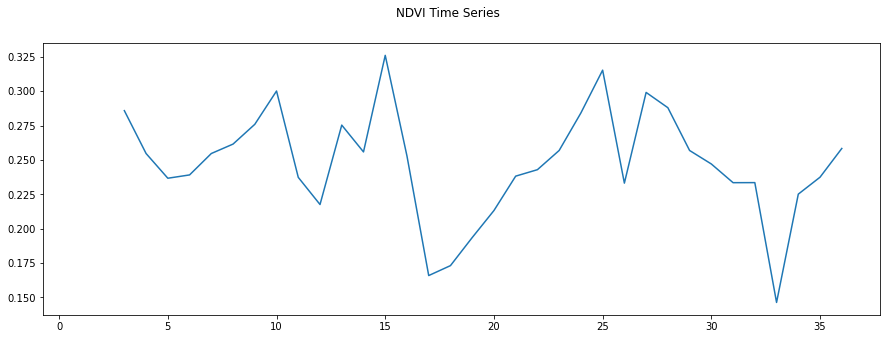

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.suptitle('NDVI Time Series')
plt.plot(ranges, meanband_ndvi)

In [22]:
print(meanband_ndvi)

[0.3115330882352941, masked, 0.2859058823529412, 0.2547139705882353, 0.23674632352941175, 0.23915073529411765, 0.2547290441176471, 0.2615886029411765, 0.27596286764705885, 0.30017794117647056, 0.2373797794117647, 0.21762904411764708, 0.27538529411764706, 0.25588970588235294, 0.3261216911764706, 0.2528944852941177, 0.1659547794117647, 0.17318198529411766, 0.19358419117647058, 0.21324448529411766, 0.2382610294117647, 0.2429636029411765, 0.25693639705882354, 0.28423639705882353, 0.3153533088235294, 0.23318088235294118, 0.29915698529411766, 0.28804448529411764, 0.2569294117647059, 0.2471044117647059, 0.23351176470588234, 0.23355551470588234, 0.14639779411764706, 0.2251764705882353, 0.23750404411764708, 0.2583904411764706]


# Spectral Profile

In [23]:
items = collection.get_items(filter={'bbox':'-45.86,-12.11,-45.75,-12.19776',
                                     'time':'2018-01-01/2018-01-03', 'limit':1000})

In [24]:
items

{'features': [{'assets': {'blue': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_blue.tif'},
    'bnir': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_bnir.tif'},
    'cnc': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_MED/089097/2018-01-01_2018-01-31/S2_10_1M_MED_089097_2018-01-01_2018-01-31_cnc.tif'},
    'coastal': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_coastal.tif'},
    'evi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_evi.tif'},
    'green': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_

## Get all bands 

In [25]:
#create empty list 
lst_url = []

bands = ['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
number_of_bands = len(bands)

for item in items.features:
    for band in bands:
        lst_url.append(item.assets[band]['href'])
print(lst_url)

['http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_coastal.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_blue.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_green.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_red.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge1.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge2.tif', 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/S2_10_1M_STK/089097/2018-01-01_2018-01-31/S2_10_1M_

## Crop all bands using previous shp

In [26]:
band_path_list = es.crop_all(lst_url, output_crops, my_shp_reproj, overwrite=True)

In [27]:
band_path_list

['/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_coastal_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_blue_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_green_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_red_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge1_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge2_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_redge3_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_bnir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_nir_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_swir1_crop.tif',
 '/home/marujo/Downloads/crop/S2_10_1M_STK_089097_2018-01-01_2018-01-31_swir2_crop.tif']

## Build brick

In [28]:
brick, _ = es.stack(band_path_list, nodata=fill_val)

In [29]:
# initialize empty list
average_band_value = []

for band_img in brick:
    average = numpy.nanmean(band_img)
    average = average/10000 #rescale data
    average_band_value.append(average)
    print(bands)
    print(average_band_value)

['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588, 0.09077242647058824]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588, 0.09077242647058824, 0.09455294117647059]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588, 0.09077242647058824, 0.09455294117647059, 0.13920992647058825]
['coastal', 'blue', 'green', 'red', 'redge1', 'redge2', 'redge3', 'bnir', 'nir', 'swir1', 'swir2']
[0.0708, 0.06729816176470588, 0.09077242647058824, 0.09455294117647059, 0.13920992647058825, 0.22206397058823532]
['coastal', 'blue', 'green', 'red', '

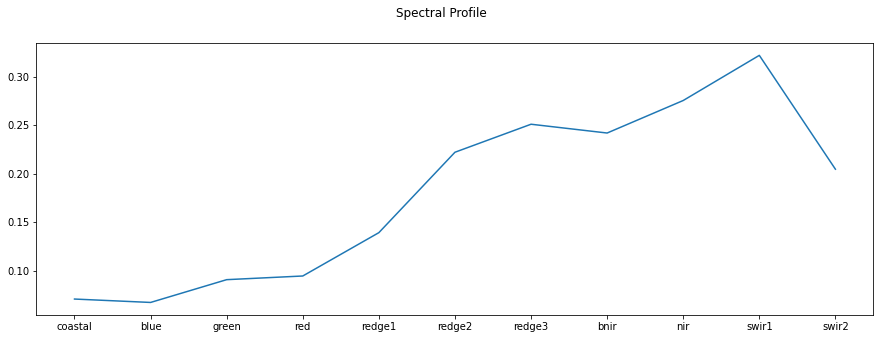

In [30]:
plt.figure(figsize=(15,5))
plt.suptitle('Spectral Profile')
plt.plot(bands, average_band_value)